# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.140774e+01     6.750977e+00
 * time: 0.004247188568115234
     1     2.742236e+01     6.107396e+00
 * time: 0.012453079223632812
     2     1.549608e+01     3.259278e+00
 * time: 0.03650808334350586
     3     1.200075e+01     2.322629e+00
 * time: 0.05749797821044922
     4     1.109821e+01     2.406076e+00
 * time: 0.13826513290405273
     5     1.052618e+01     1.578308e+00
 * time: 0.15453004837036133
     6     9.796146e+00     1.030623e+00
 * time: 0.17055201530456543
     7     9.291063e+00     1.368550e+00
 * time: 0.1865401268005371
     8     8.993594e+00     8.721228e-01
 * time: 0.2025141716003418
     9     8.973920e+00     1.989265e+00
 * time: 0.21465301513671875
    10     8.866417e+00     1.233312e+00
 * time: 0.22693800926208496
    11     8.862637e+00     1.152748e+00
 * time: 0.23912906646728516
    12     8.737342e+00     8.606360e-01
 * time: 0.2510831356048584
    13     8.623083e+00     5.965140e-01
 * time: 

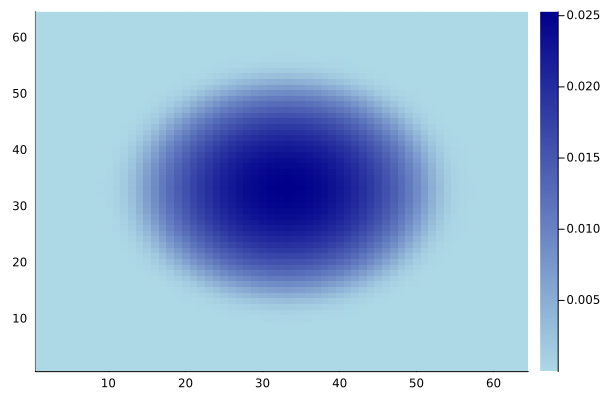

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)